

```
# This is formatted as code
```

<h1>Peru Drone Data Analysis: Data Cleaning and Missingness visualization</h1>

In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = [20, 12]
#higher quality plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the Data




In [ ]:
!ls drive/My\ Drive/UNICEF/Data_Sources/Drone_Peru

hourly_measurement_qh007_unicef.csv  hourly_measurement_qh012_unicef.csv
hourly_measurement_qh008_unicef.csv  hourly_measurement_qh013_unicef.csv
hourly_measurement_qh010_unicef.csv  hourly_measurement_qh014_unicef.csv
hourly_measurement_qh011_unicef.csv


In [ ]:
Loading the Data
data1 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh007_unicef.csv')
data2 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh008_unicef.csv')
data3 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh010_unicef.csv')
data4 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh011_unicef.csv')
data5 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh012_unicef.csv')
data6 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh013_unicef.csv')
data7 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh014_unicef.csv')


In [ ]:
station_list= [data1,data2,data3,data4,data5,data6,data7]

In [ ]:
#Date Time Conversion and Indexing
def time_conv(df):
    for station in df:
        station['timestamp'] = pd.to_datetime(station.timestamp)
        station.set_index('timestamp',inplace=True)
time_conv(station_list)

#data[["timestamp"]] = data[["timestamp"]].astype("datetime64")
#Converting to YYYY-MM-dd HH:mm
#data[["timestamp"]] = data[["timestamp"]].df.strftime("dd-MM-YYYY hh:mm")

In [ ]:
#Data range for stations till 2020-07-31
temp_time_long = pd.date_range('2020-02-01 00:00', '2020-7-31 23:00', freq='H')
temp_time_long = [i for i in temp_time]
time_df_long=pd.DataFrame(temp_time_long, columns=['timestamp'])
time_df_long.set_index('timestamp',inplace=True)

#Merge with the dataframes for stations till 2020-07-31 [Stations 1,6,7]
data1 = pd.merge(data1,time_df_long,left_index=True, right_index=True, how='outer')
data6 = pd.merge(data6,time_df_long,left_index=True, right_index=True, how='outer')
data7 = pd.merge(data7,time_df_long,left_index=True, right_index=True, how='outer')
data2 = pd.merge(data2,time_df_long,left_index=True, right_index=True, how='outer')
data3 = pd.merge(data3,time_df_long,left_index=True, right_index=True, how='outer')
data4 = pd.merge(data4,time_df_long,left_index=True, right_index=True, how='outer')
data5 = pd.merge(data5,time_df_long,left_index=True, right_index=True, how='outer')

print("Till 7/31:")
print("S1: ", len(data1))
print("S2: ", len(data2))
print("S3: ", len(data3))
print("S4: ", len(data4))
print("S5: ", len(data5))
print("S6: ", len(data6))
print("S7: ", len(data7))


Till 7/31:
S1:  4385
S2:  4370
S3:  4375
S4:  4380
S5:  4370
S6:  4368
S7:  4368


In [ ]:
# #data range test for stations till 2020-05-15 [Stations 2,3,4,5]
# temp_time_short = pd.date_range('2020-02-01 00:00', '2020-5-15 23:00', freq='H')
# temp_time_short = [i for i in temp_time]
# time_df_short=pd.DataFrame(temp_time_short, columns=['timestamp'])
# time_df_short.set_index('timestamp', inplace=True)
# #Merge with the dataframes
# data2 = pd.merge(data2,time_df_short,left_index=True, right_index=True, how='outer')
# data3 = pd.merge(data3,time_df_short,left_index=True, right_index=True, how='outer')
# data4 = pd.merge(data4,time_df_short,left_index=True, right_index=True, how='outer')
# data5 = pd.merge(data5,time_df_short,left_index=True, right_index=True, how='outer')

# print("Till 5/15: required")
# print("S2: ", len(data2))
# print("S3: ", len(data3))
# print("S4: ", len(data4))
# print("S5: ", len(data5))


#The Principal Pollutants can be compared to Secondary Sources like OpenAQ, US Embassy at Peru

# Tackling [uv, humidity, temperature, spl, pressure]



1.   Fill in the missing values in the above fields
        - Uniform Missingness till 2020-03-18 23:00:00
2.   Is there a way through which we can find some relation between these and the pollution levels.
        - More evidence Required. Secondary Sources need to be explored

Meteorological Data Available from: 2020-03-18 23:00:00


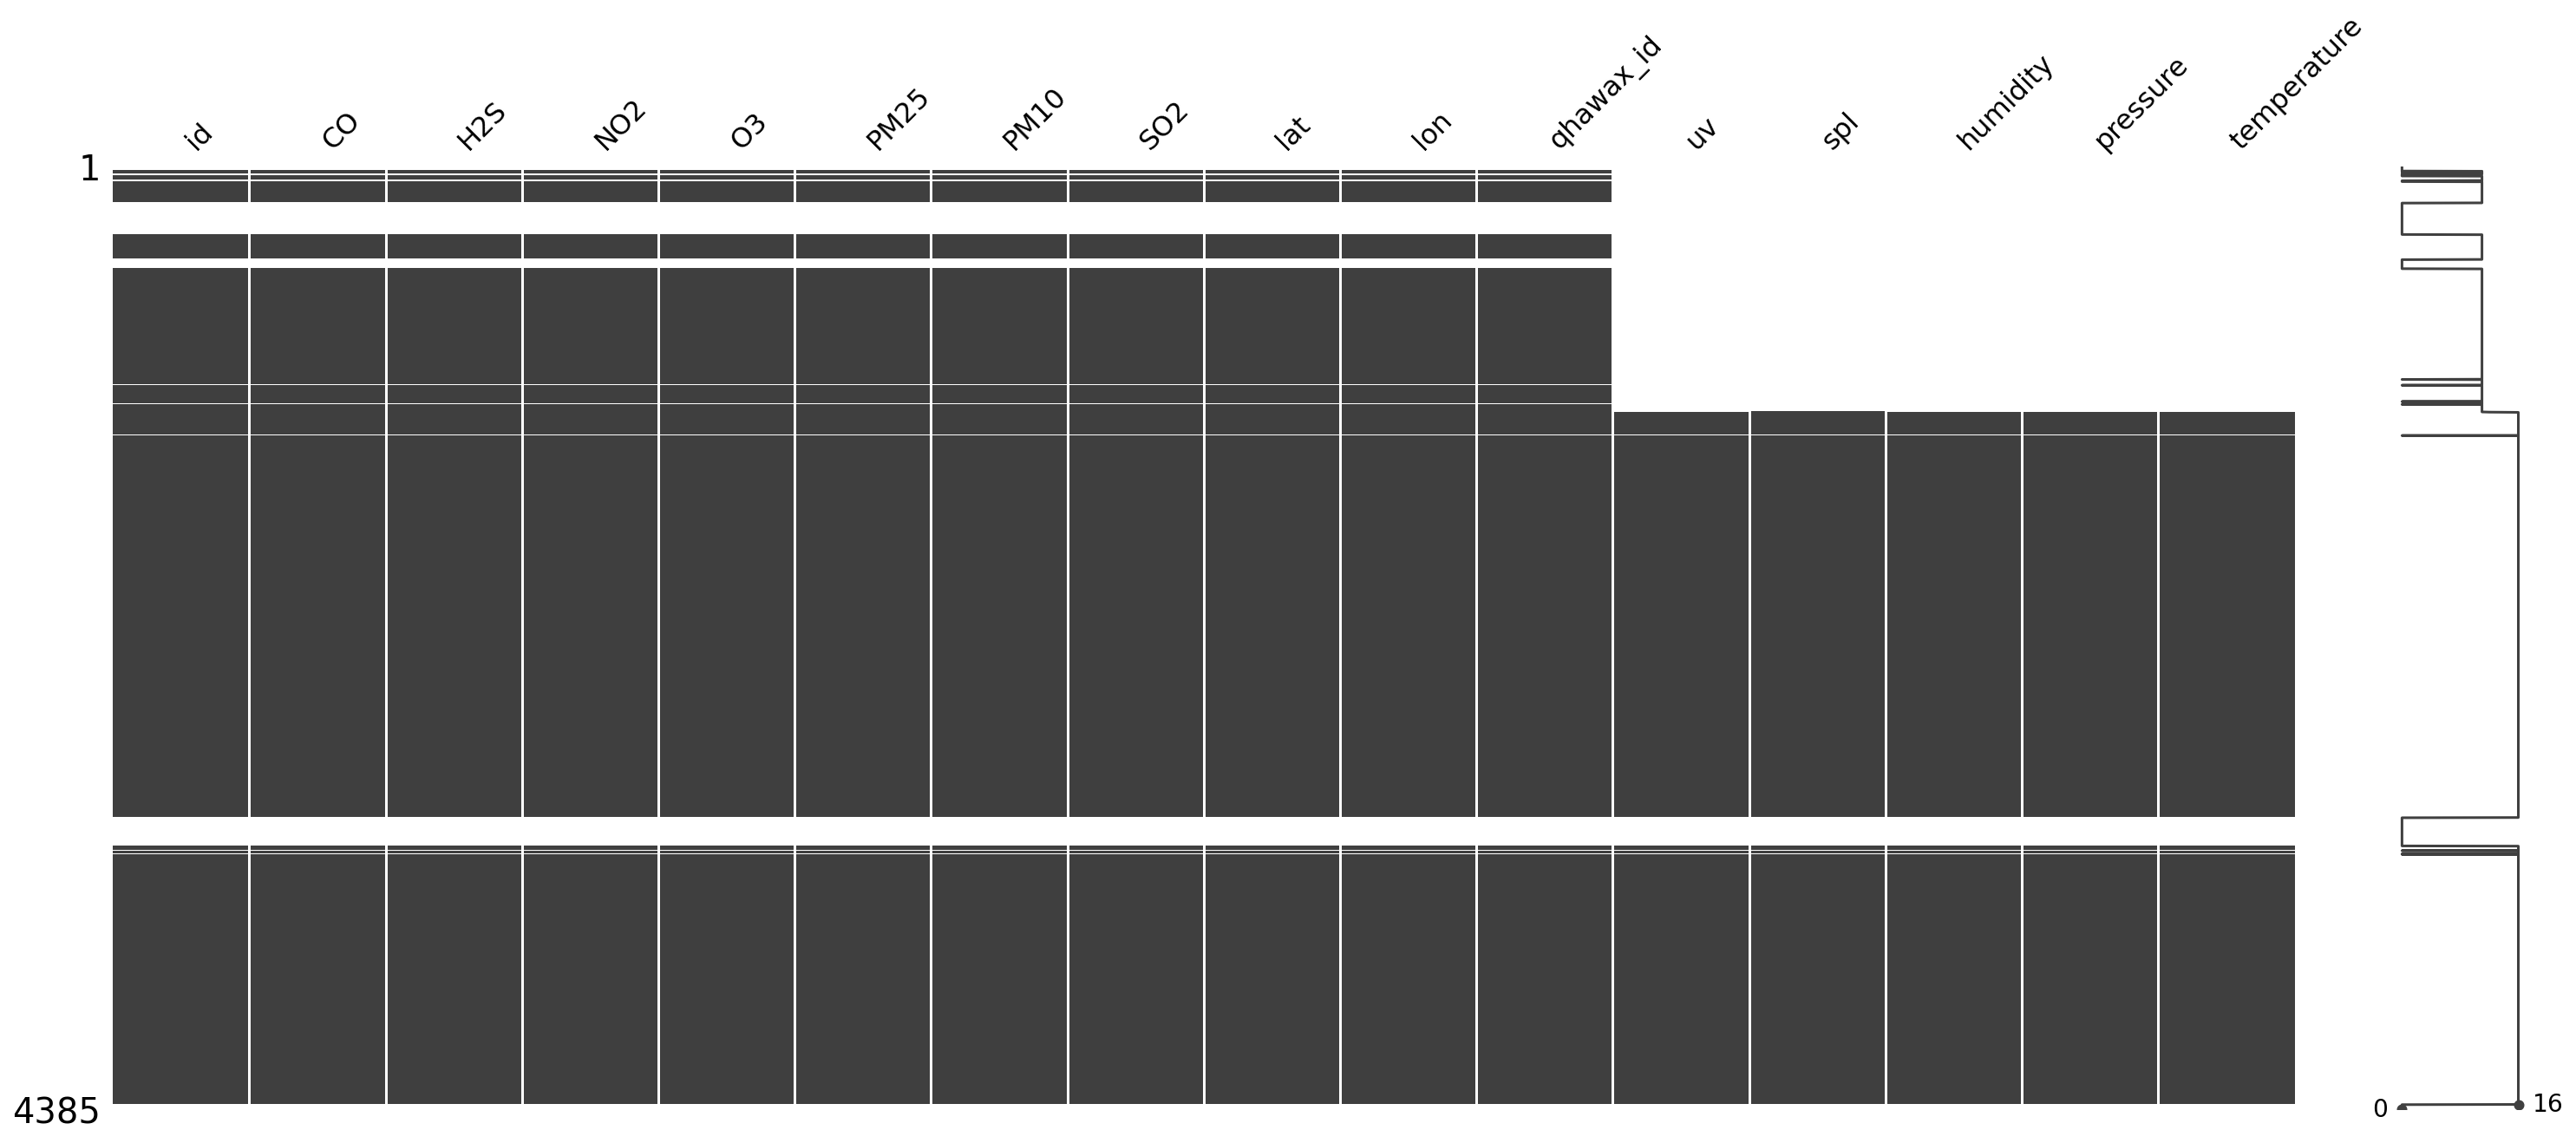

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data1)

Meteorological Data Available from: 2020-03-18 23:00:00


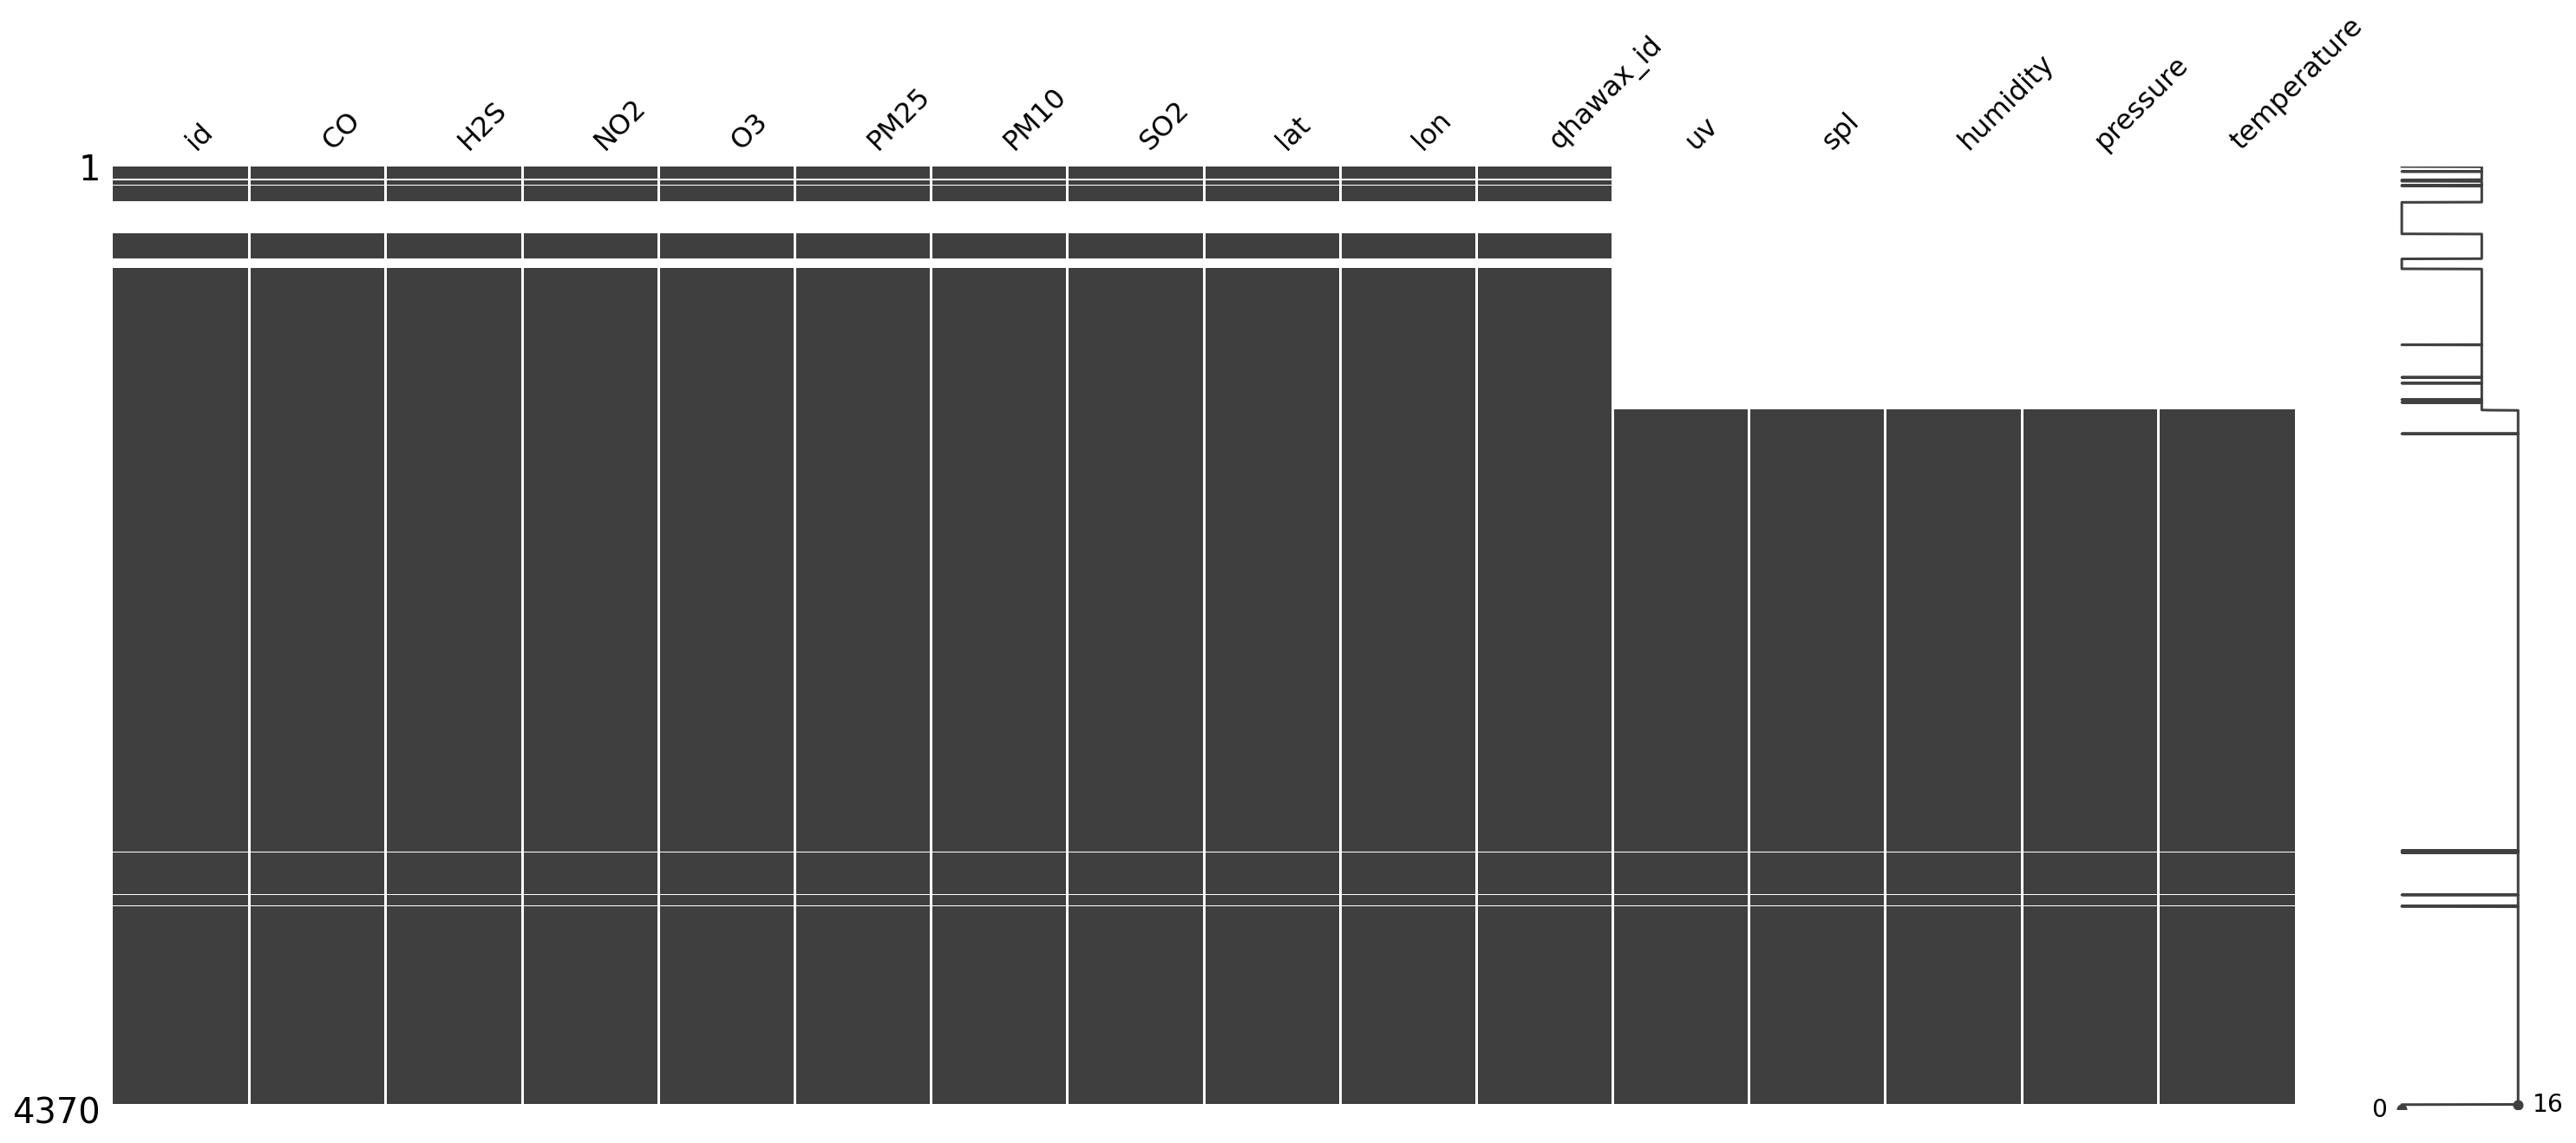

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data2)

Meteorological Data Available from: 2020-03-18 23:00:00


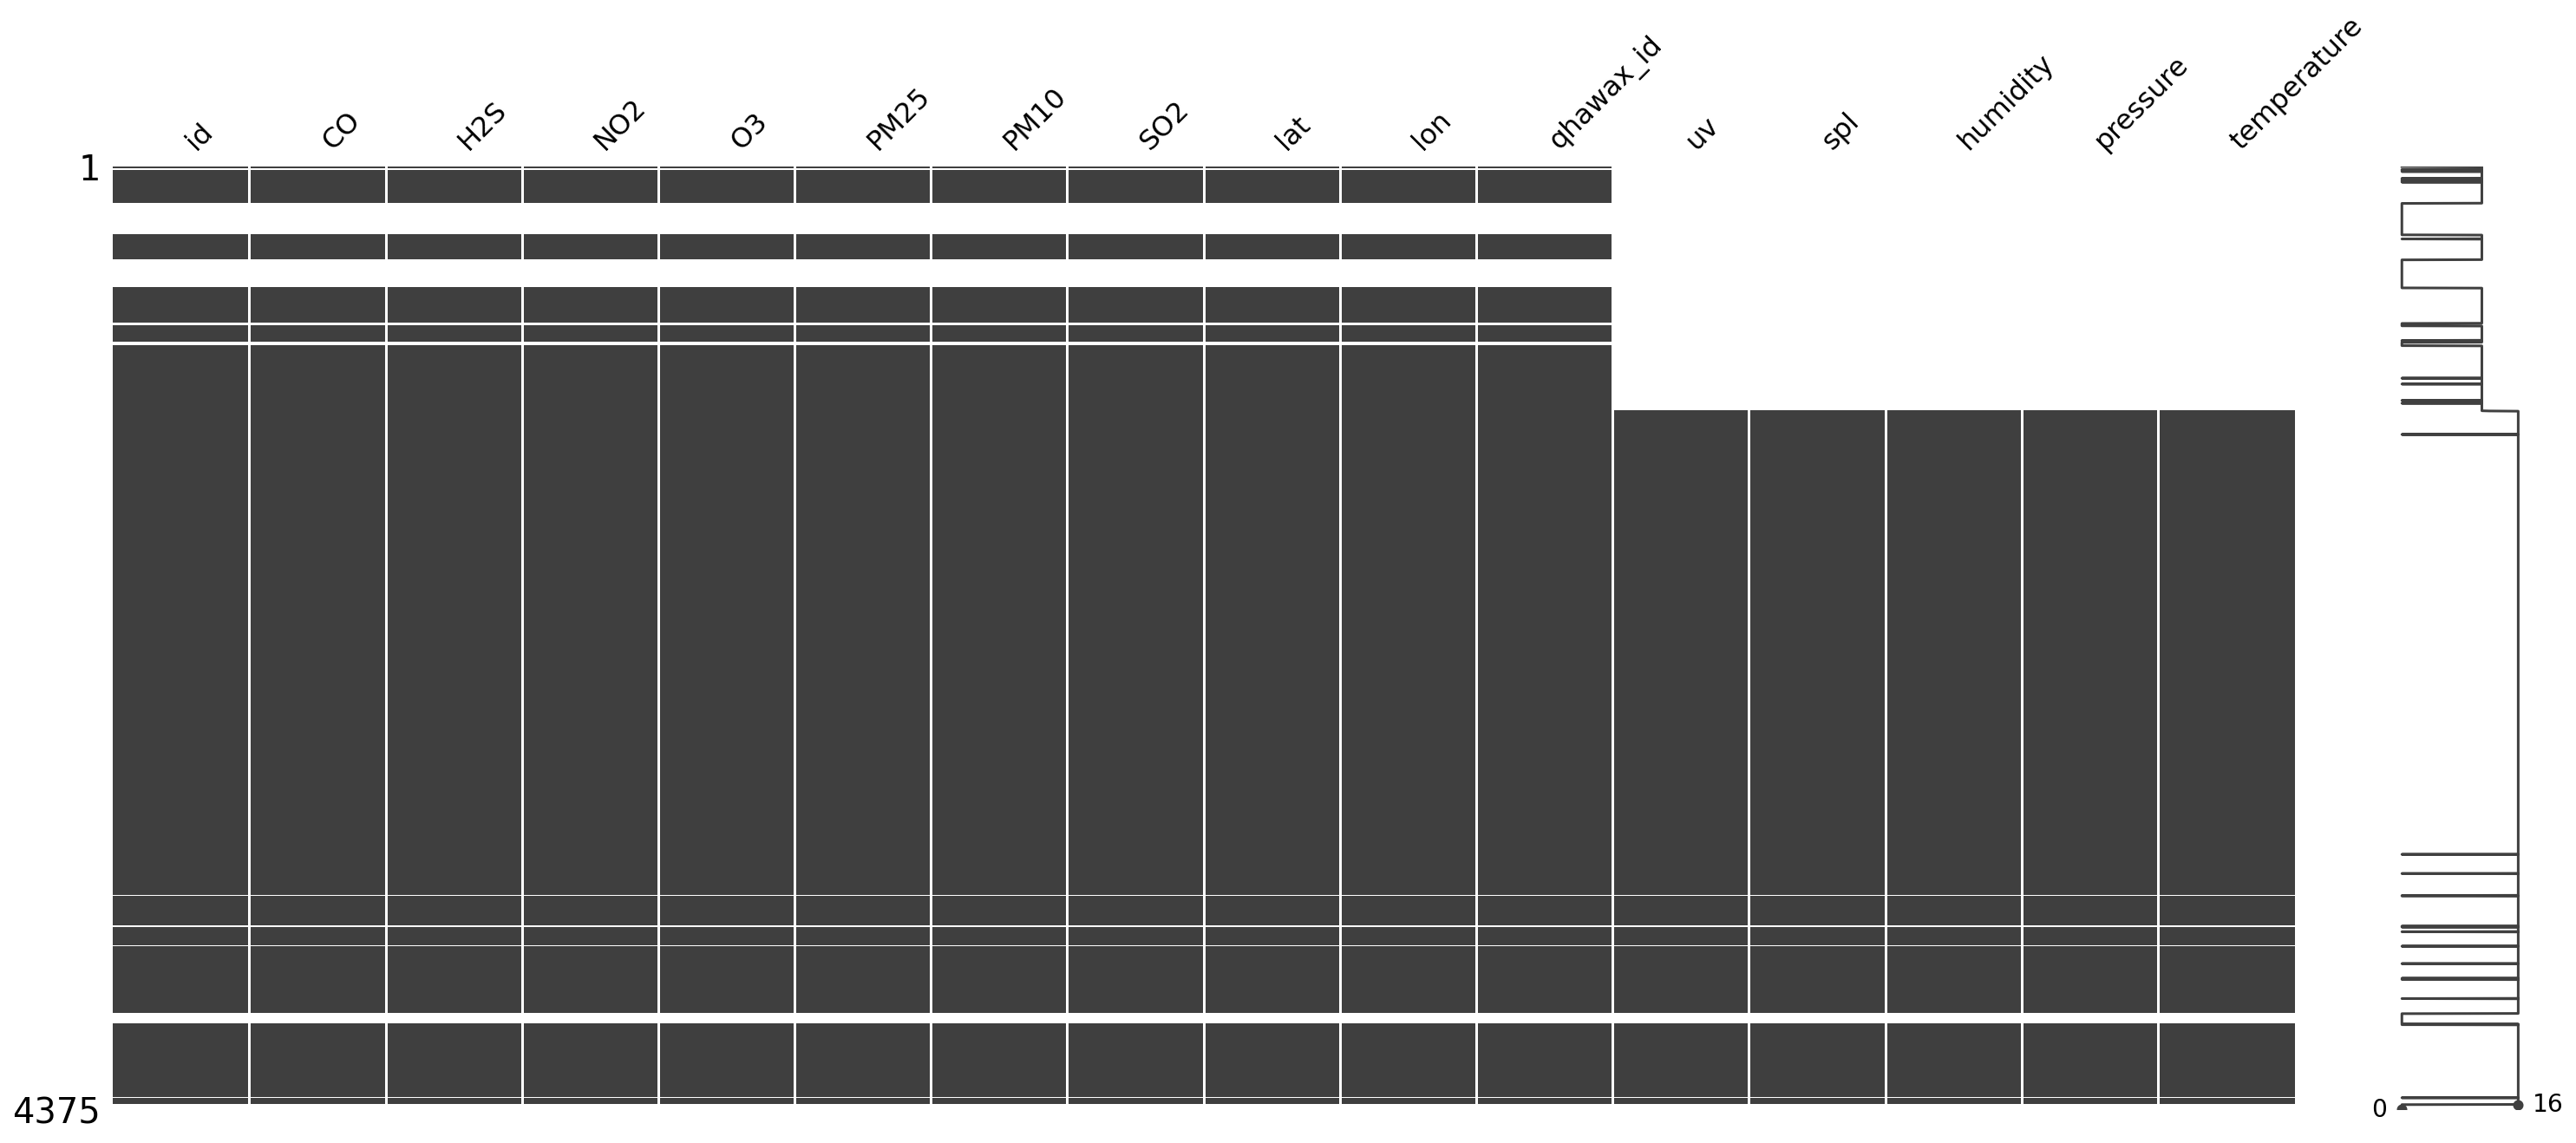

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data3)

Meteorological Data Available from: 2020-03-18 23:00:00


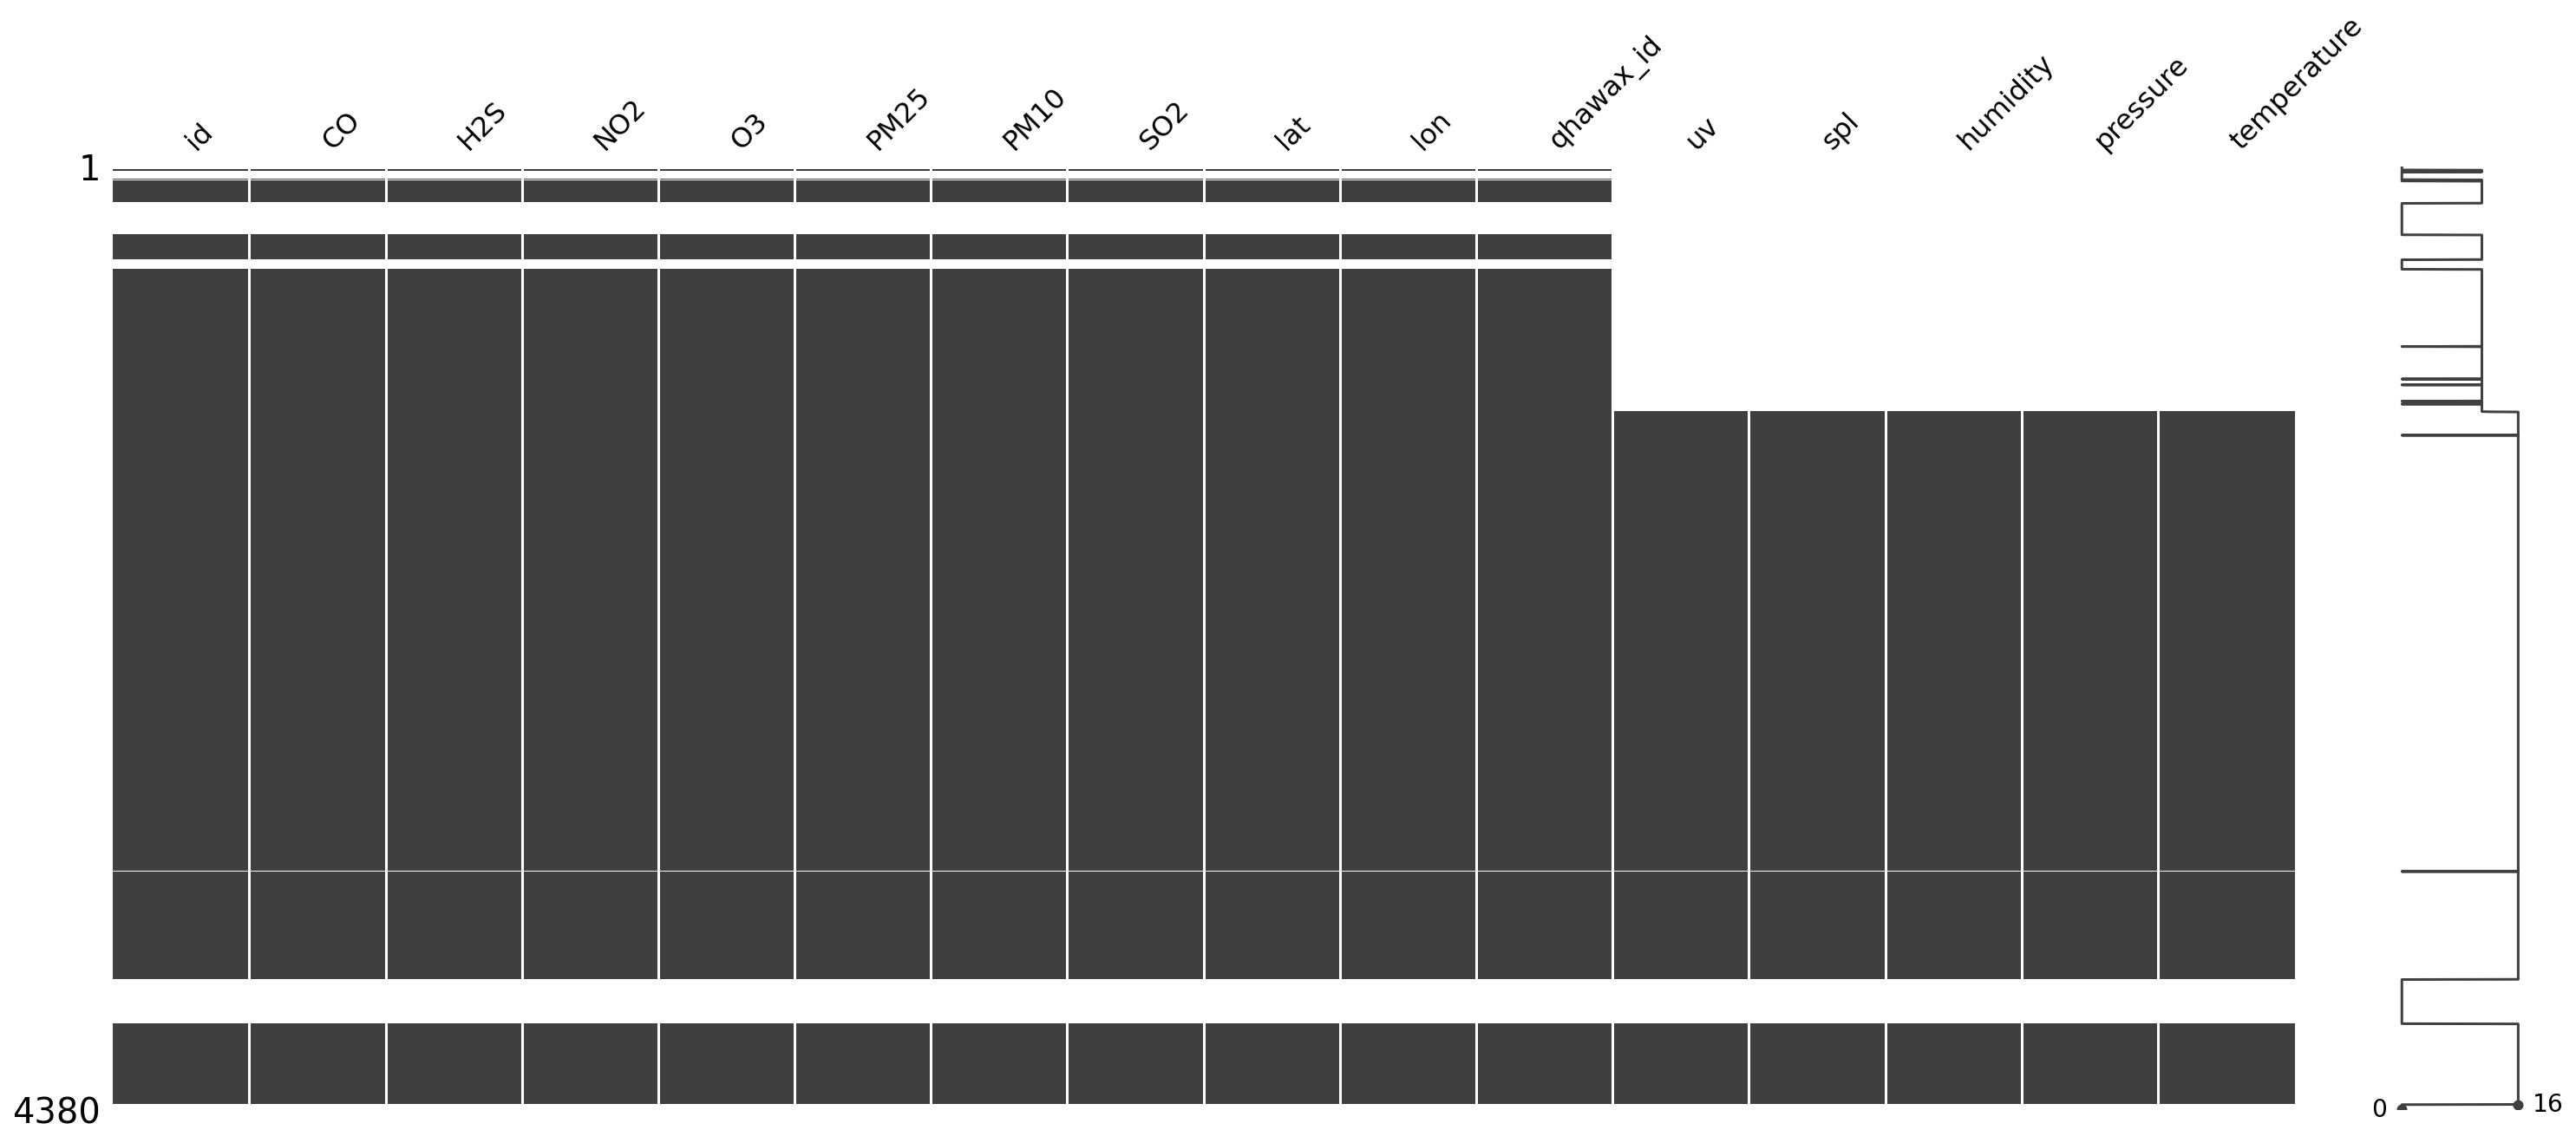

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data4)

Meteorological Data Available from: 2020-03-18 23:00:00


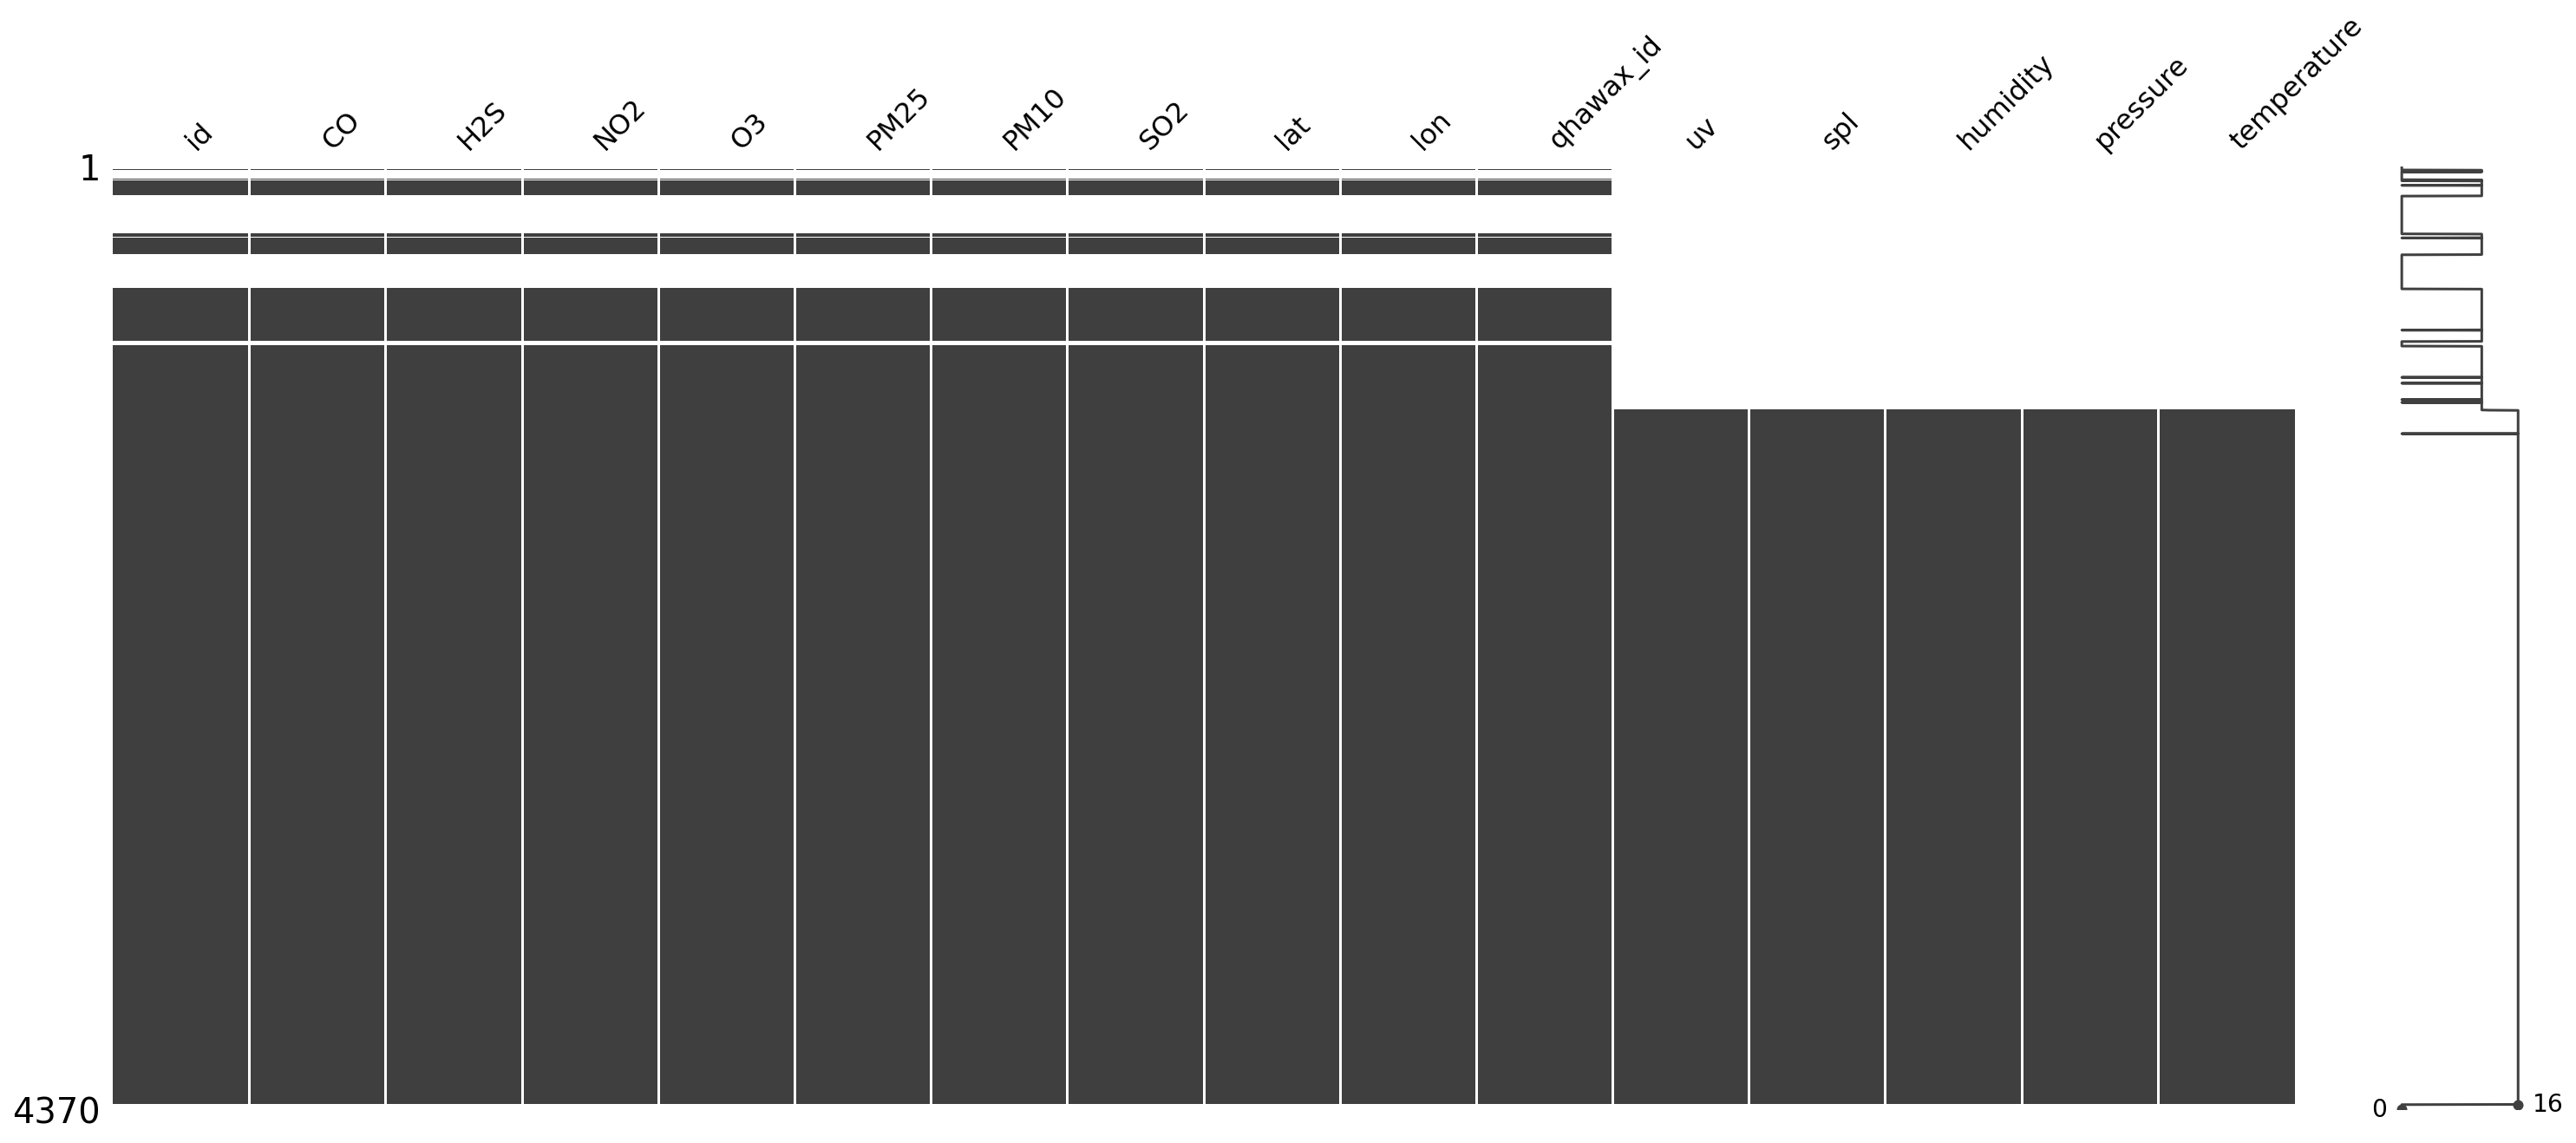

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data5)

Meteorological Data Available from: 2020-03-19 00:00:00


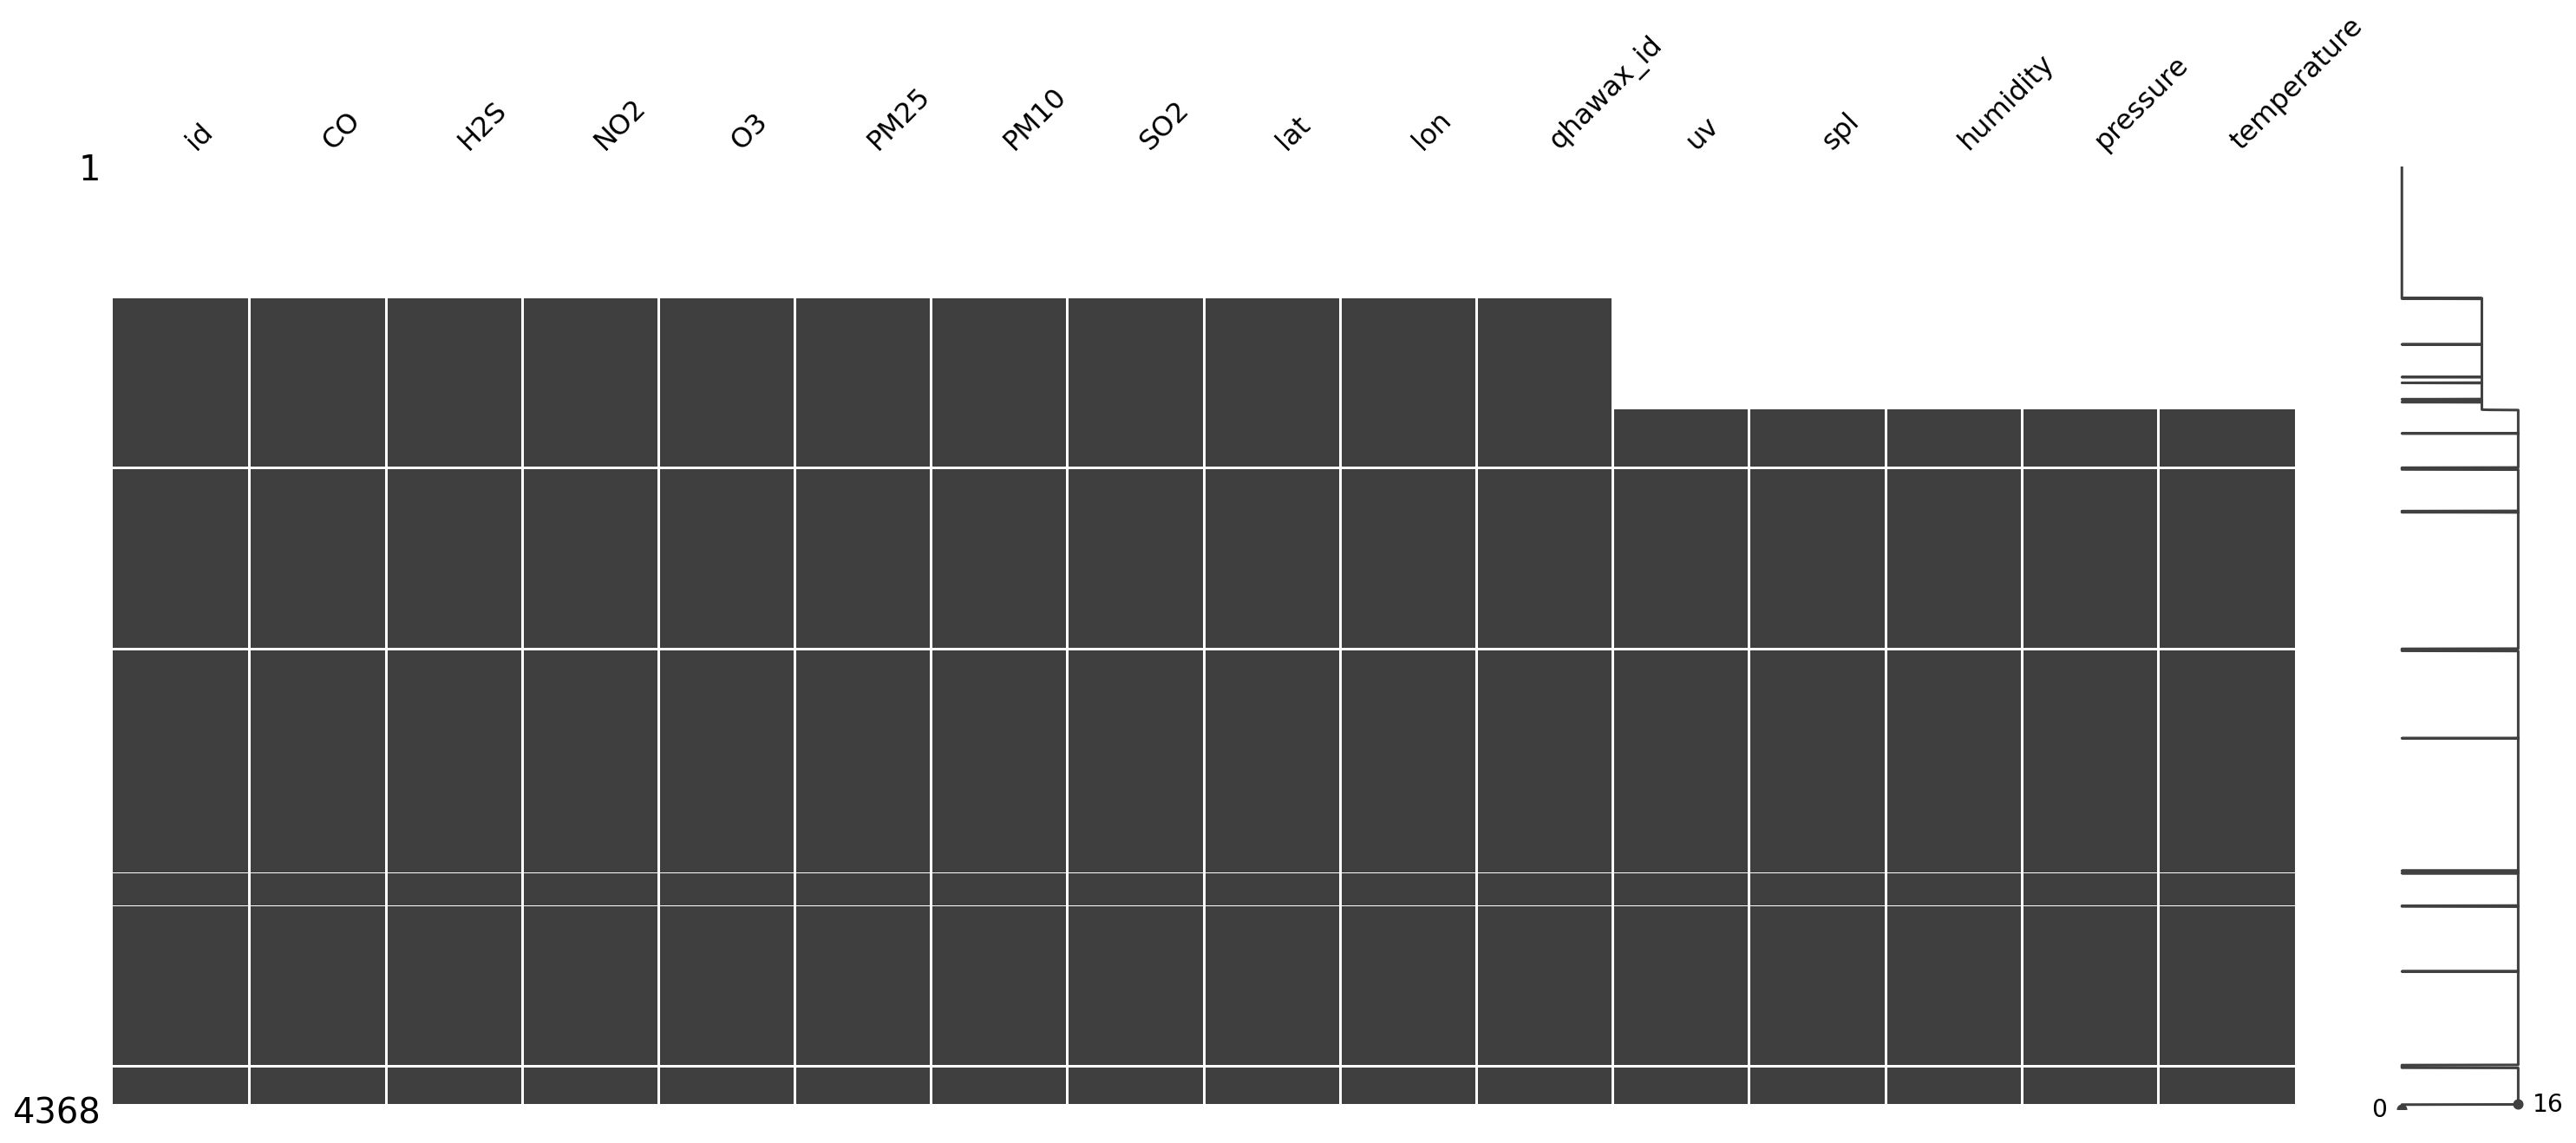

In [ ]:
print("Meteorological Data Available from: 2020-03-19 00:00:00")
msno.matrix(data6)

Meteorological Data Available from: 2020-03-18 23:00:00


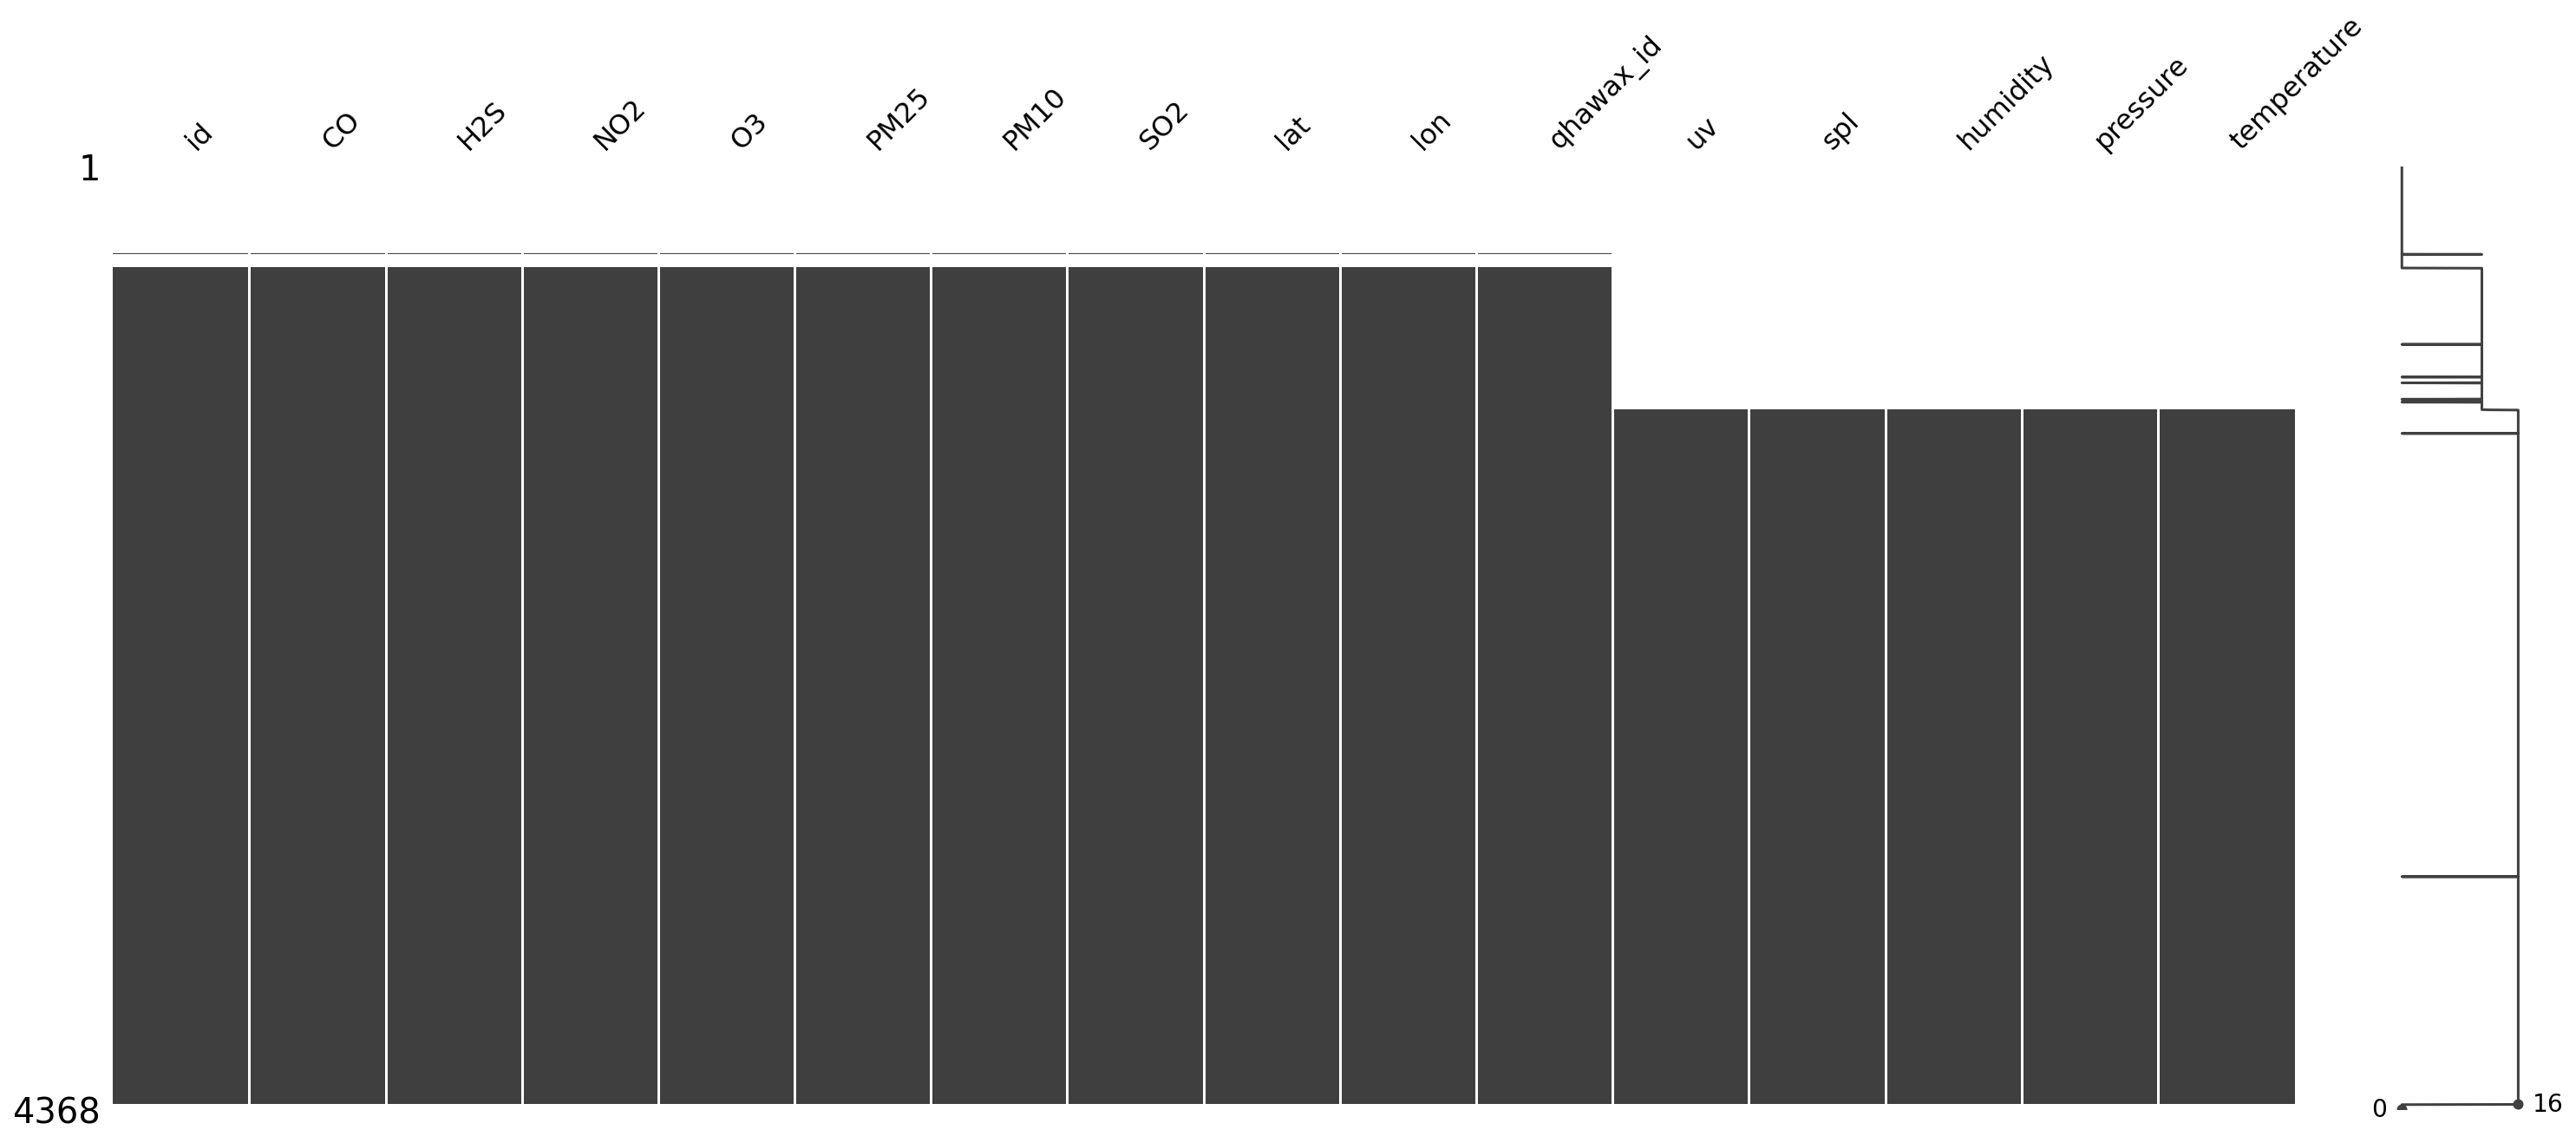

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data7)

## Observation: Uniform Missingness in the Meteorological Data from All the stations from 2020-02-01 to 2020-03-15

-- Need secondary source

In [ ]:
#Creating Master Dataframe
data = pd.concat([data1, data2, data3, data4, data5, data6, data7])
data.reset_index(inplace=True)
data["Datedate"] = data["timestamp"].dt.to_period("d")
data["DateMonth"] = data["timestamp"].dt.to_period("M")
data.head()

,timestamp,id,CO,H2S,NO2,O3,PM25,PM10,SO2,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature,Datedate,DateMonth
0,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
1,2020-02-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
2,2020-02-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
3,2020-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
4,2020-02-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02


In [ ]:
#Required for Spatial Plotting
print("lat:min",data.lat.min())
print("lat:max",data.lat.max())
print("long:min",data.lon.min())
print("long:max",data.lon.max())

lat:min -12.109722999999999
lat:max -12.04
long:min -77.083
long:max -76.98899999999999


In [ ]:
data.columns

Index(['timestamp', 'id', 'CO', 'H2S', 'NO2', 'O3', 'PM25', 'PM10', 'SO2',
       'lat', 'lon', 'qhawax_id', 'uv', 'spl', 'humidity', 'pressure',
       'temperature', 'Datedate', 'DateMonth'],
      dtype='object')

In [ ]:
#considering the meteorological factors and PM2.5 with NO2

met_cols = ['timestamp','lat', 'lon', 'qhawax_id', 'uv', 'spl', 'humidity', 'pressure',
       'temperature','Datedate', 'DateMonth','PM25', 'NO2']


In [ ]:
data[met_cols].groupby(['qhawax_id','timestamp']).head()

,timestamp,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature,Datedate,DateMonth,PM25,NO2
0,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
1,2020-02-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
2,2020-02-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
3,2020-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
4,2020-02-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30588,2020-07-30 20:00:00,-12.043889,-77.050552,14.0,0.0,62.963,91.653,99692.509,14.832,2020-07-30,2020-07,9.167,66.158
30589,2020-07-30 21:00:00,-12.043889,-77.050552,14.0,0.0,63.363,90.828,99758.122,14.976,2020-07-30,2020-07,8.914,63.951
30590,2020-07-30 22:00:00,-12.043889,-77.050552,14.0,0.0,61.704,90.826,99781.980,14.979,2020-07-30,2020-07,8.621,54.313
30591,2020-07-30 23:00:00,-12.043889,-77.050552,14.0,0.0,60.513,89.961,99772.029,15.082,2020-07-30,2020-07,9.082,45.663


In [ ]:
data_met = data[met_cols]

In [ ]:
#no. of unique values
feats_counts = data_met.nunique(dropna = False)
feats_counts.sort_values()[:10]

DateMonth          6
qhawax_id          8
lat               22
lon               22
Datedate         182
uv              3681
timestamp       4368
temperature    10613
PM25           14867
spl            14869
dtype: int64

In [ ]:
data_met.describe()

,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature,PM25,NO2
count,27456.000000,27456.000000,27456.000000,22056.000000,22063.000000,22056.000000,22056.000000,22056.000000,27456.000000,27456.000000
mean,-12.065563,-77.046053,10.656723,0.666364,64.265515,84.884248,99916.906549,19.475378,11.439036,55.509469
std,0.026377,0.028262,2.378113,1.334359,11.762543,11.223036,485.057236,3.676046,11.595794,78.702281
min,-12.109723,-77.083000,7.000000,0.000000,35.733000,39.443000,98880.507000,12.904000,0.000000,-545.963000
25%,-12.103056,-77.071945,8.000000,0.000000,56.909500,78.637000,99527.511000,16.607750,5.424000,20.622750
50%,-12.054722,-77.050552,11.000000,0.000000,61.905000,88.290500,99804.174000,18.790500,8.823500,30.537500
75%,-12.043889,-77.029724,13.000000,0.720250,67.030500,93.570250,100357.245750,21.660250,13.905500,52.534000
max,-12.040000,-76.989000,14.000000,8.649000,113.604000,99.300000,101077.947000,32.895000,227.766000,3295.416000


In [ ]:
#nan values
data_met.isnull().sum()

timestamp         0
lat            3160
lon            3160
qhawax_id      3160
uv             8560
spl            8553
humidity       8560
pressure       8560
temperature    8560
Datedate          0
DateMonth         0
PM25           3160
NO2            3160
dtype: int64

# Change in the daily mean of meteorological factors

How the levels of meteorological factors are varying, taking their global daily average.

In [ ]:
#data_date = data.groupby("Datedate").mean().drop(["id","lat","lon","qhawax_id","uv","spl","humidity","pressure","temperature"], axis=1)
##Plot Met, ID vs Time
data_date = data_met.groupby(['Datedate','qhawax_id']).mean().drop(["lat","lon",'PM25','NO2'], axis=1).unstack()

#data_date = data[met_cols].groupby(['qhawax_id'])
data_date

uv                      ... temperature                      
qhawax_id       7.0       8.0       10.0  ...        12.0       13.0       14.0
Datedate                                  ...                                  
2020-02-01       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-02       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-03       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-04       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-05       NaN       NaN       NaN  ...         NaN        NaN        NaN
...              ...       ...       ...  ...         ...        ...        ...
2020-07-27  0.261875  0.283333  0.345958  ...   14.586542  14.421958  14.492792
2020-07-28  0.371833  0.459750  0.408083  ...   14.939750  15.378958  14.931250
2020-07-29  0.352375  0.510250  0.442043  ...   15.130875  15.582208  15.030833
2020-07-30  0.476333  0.521417  0.475875  ...   16.072708  16.318125  15.682042
2020-07-31  0.000000  0.000000  0.000000  ...   14.686000  14.804000  14.687000

[176 rows x 35 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9b242e1d0>,
      dtype=object)

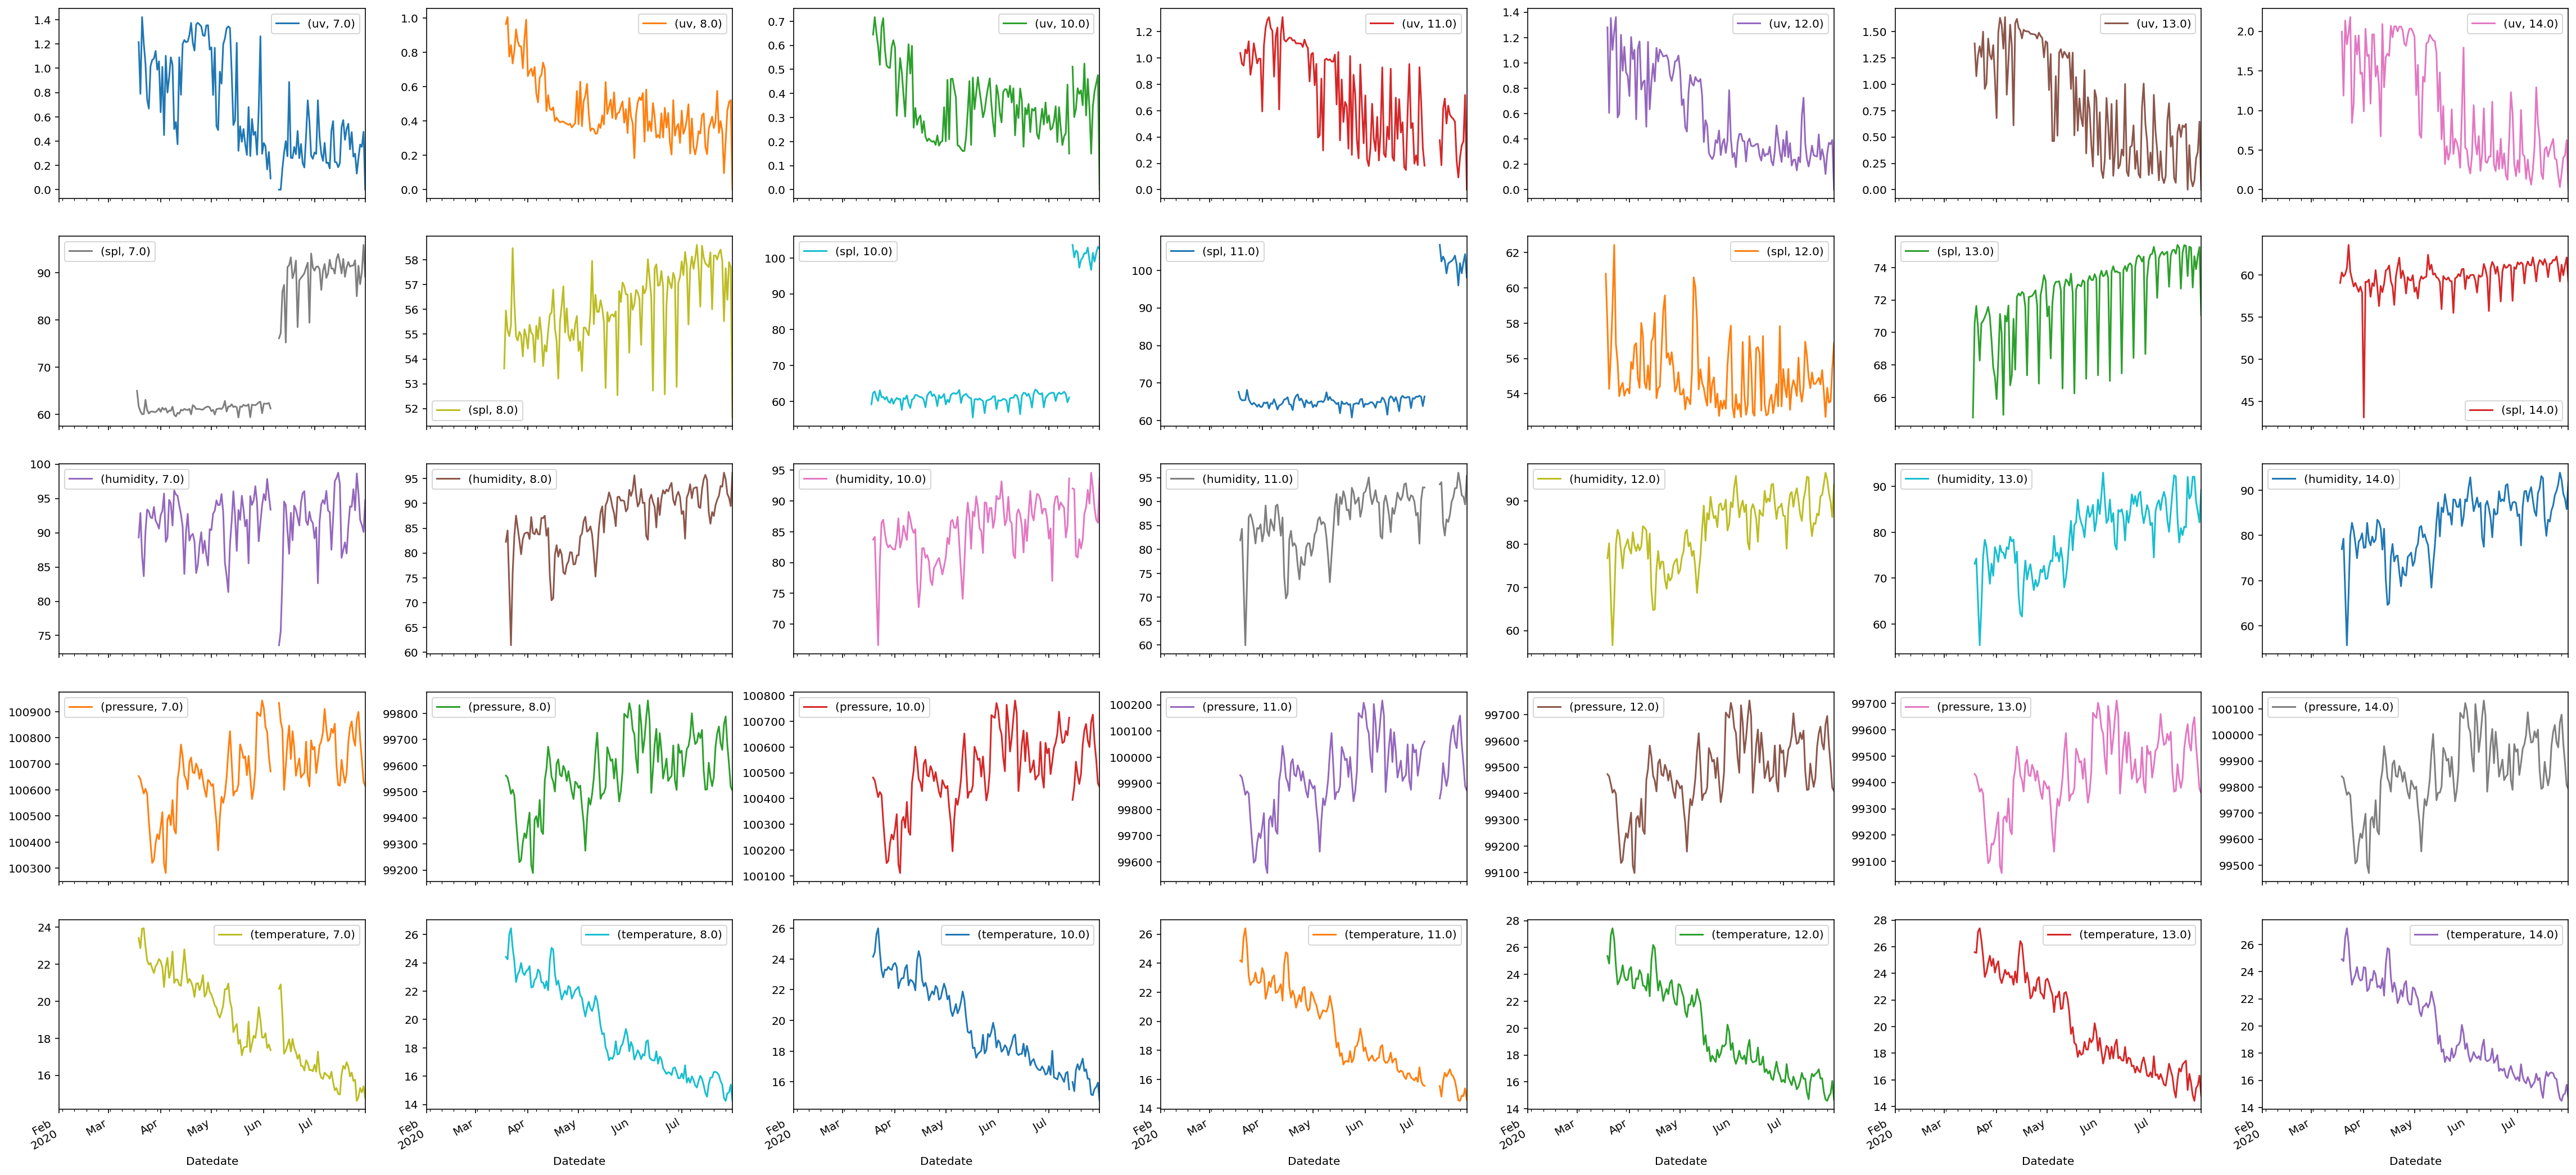

In [ ]:
data_date.plot.line(subplots=True, figsize=(40,20), layout=(5,7))

In [ ]:
#Creating the dataset for Meteorological Evaluation
met_cols = met_cols = [ 'timestamp','lat', 'lon', 'qhawax_id', 'uv', 'spl', 
                       'humidity', 'pressure', 'temperature']
met_data = data[met_cols]
print(met_data.head())
##Dataframe to Plot Met, ID vs Time
met_data = met_data.groupby(['Datedate','qhawax_id']).mean().unstack()
#Checking for the nature of missingness
msno.matrix(met_data)

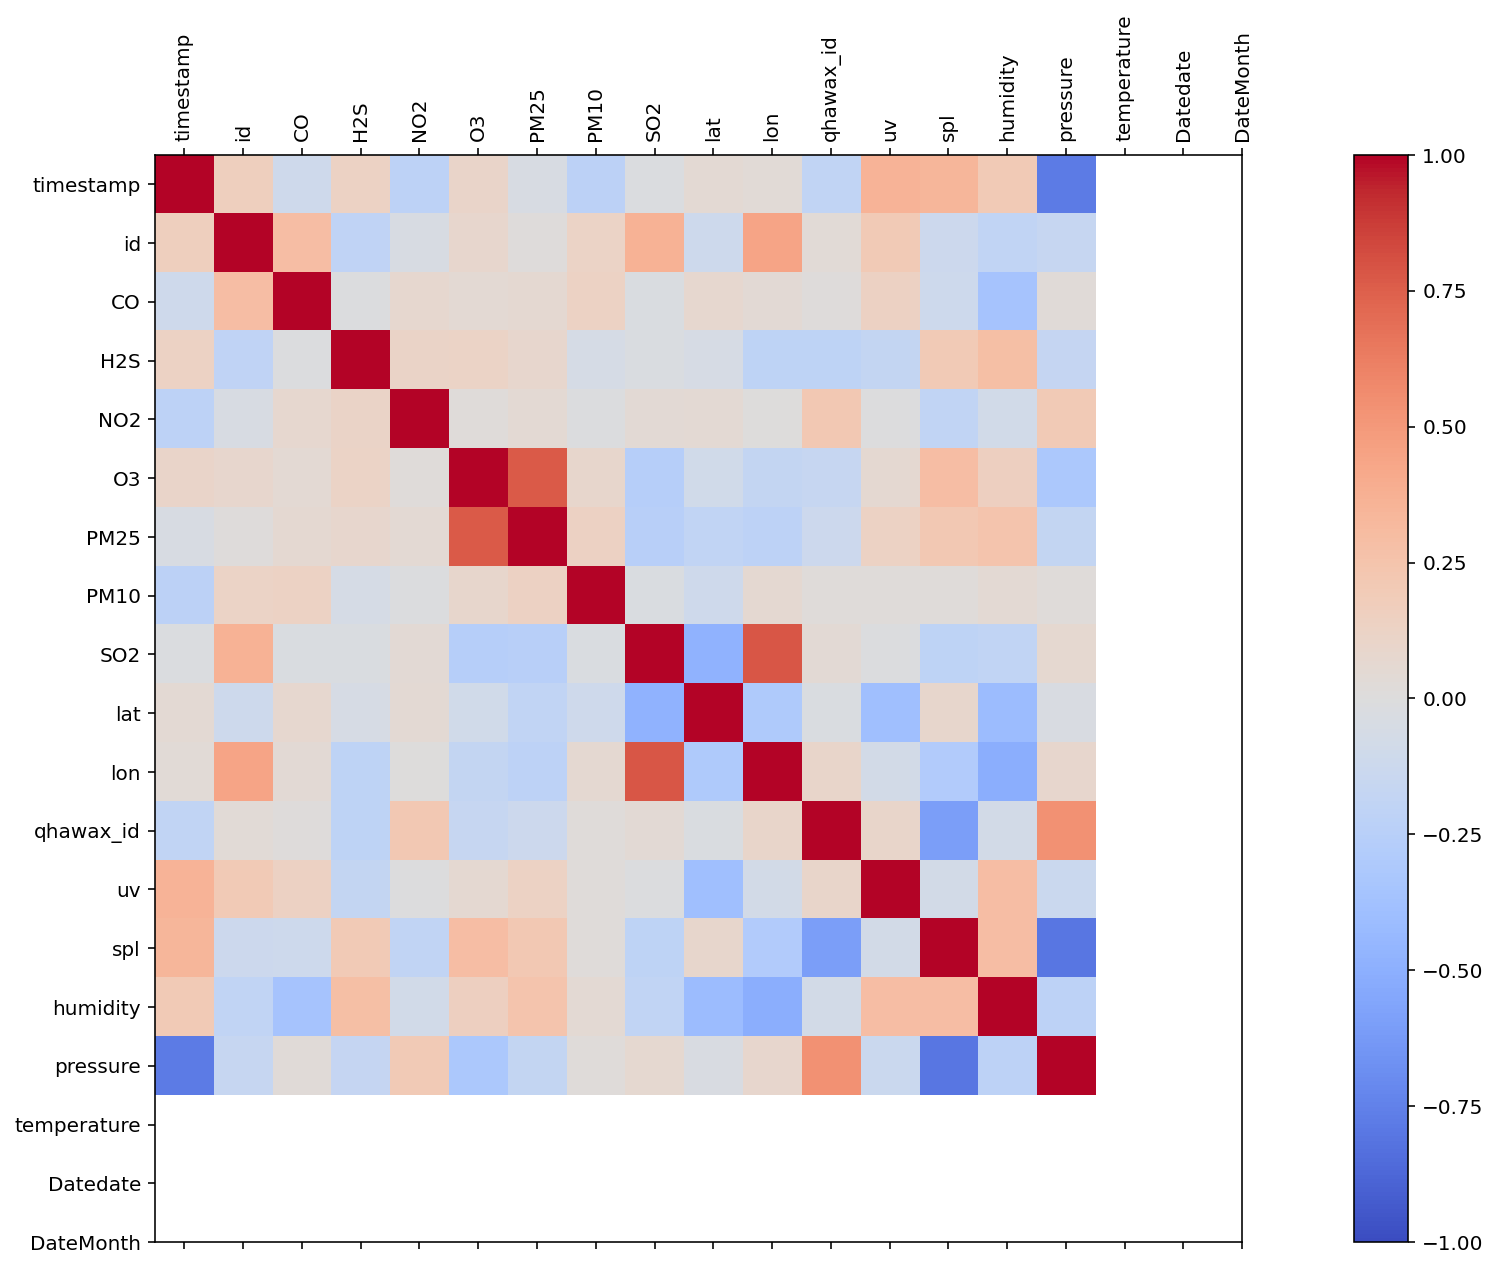

In [ ]:
#Considering PM2.5 & NO2 for deeper analysis
#Checking for correlation 
corr = data.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()


#Checking for Correlation between Met Factors

# Abnormalities and Interpretabilty

1.    Any abnormalities in the dataset?
    - The uniform Missingness 
2.    How do we make this data relevant and usable?
    - Need to combine the temporal and spatial data
